# A. Present state analytics – Andra Pradesh India


In [1]:
import pandas as pd
import pylab as pl
import numpy as np
import scipy.optimize as opt
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
%matplotlib inline 
import matplotlib.pyplot as plt
import seaborn as sb

df = pd.read_csv("Andhra Pradesh_COVID19_DATA.csv")
df.head()

,Sno,Date,Time,State/UnionTerritory,Recovered,Deaths,Confirmed
0,122,12/3/2020,6:00 PM,Andhra Pradesh,0,0,1
1,135,13/03/20,6:00 PM,Andhra Pradesh,0,0,1
2,148,14/03/20,6:00 PM,Andhra Pradesh,0,0,1
3,149,15/03/20,6:00 PM,Andhra Pradesh,0,0,1
4,163,16/03/20,6:00 PM,Andhra Pradesh,0,0,1


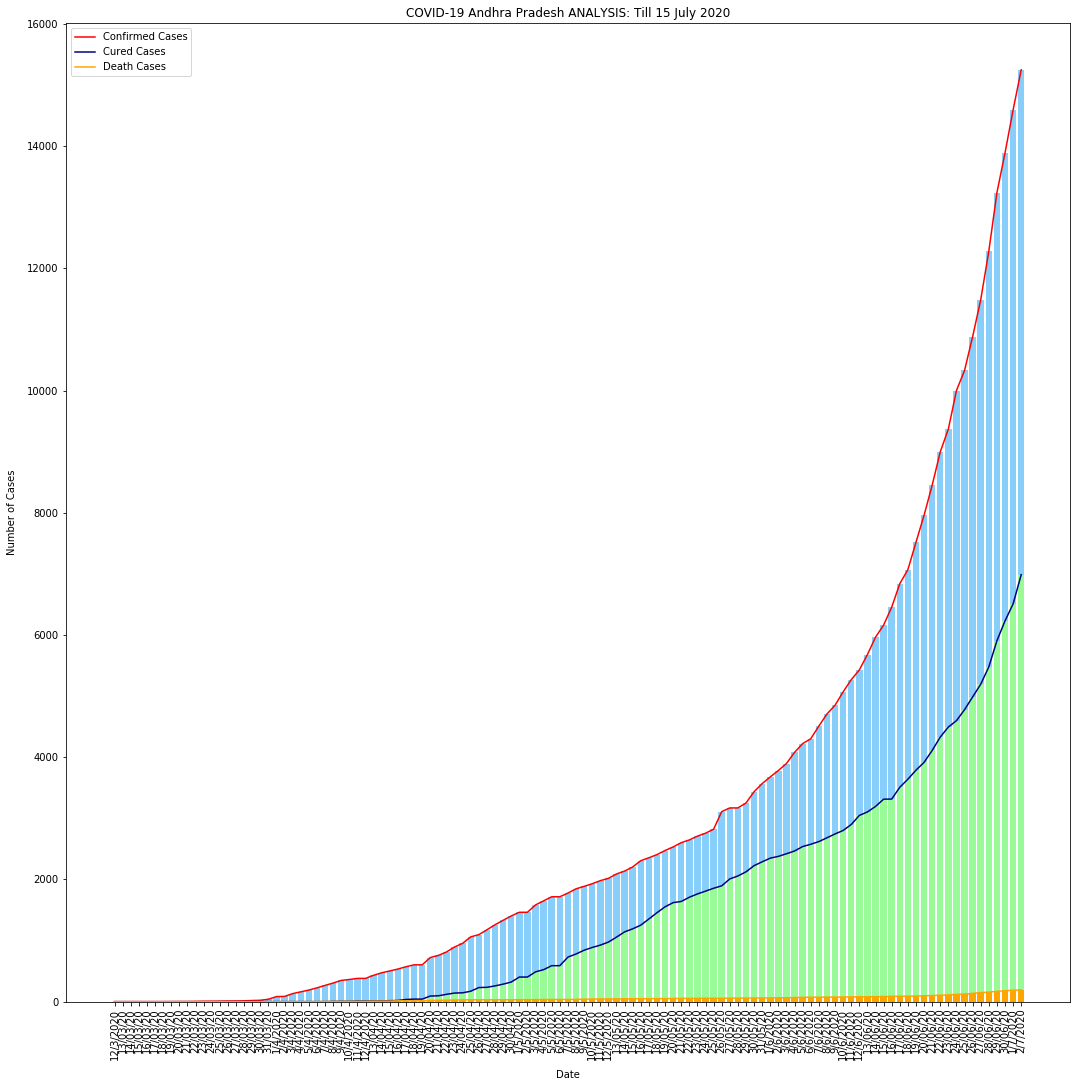

In [2]:
from matplotlib import pyplot as plt

plt.figure(figsize=(18, 18))

#plt.plot(df_filtered.Date,df_hosp.Beds,color="grey",label='Total Samples')
plt.plot(df.Date,df.Confirmed,color="red",label='Confirmed Cases')
plt.plot(df.Date,df.Recovered,color="navy",label='Cured Cases')
plt.plot(df.Date,df.Deaths,color="orange",label='Death Cases')
plt.legend()
#plt.bar(df_filtered.Date,df_hosp.Beds,color="grey",label='Total Samples')
plt.bar(df.Date,df.Confirmed,label='Confirmed Cases',color='lightskyblue')
plt.bar(df.Date,df.Recovered,color="palegreen",label='Cured Cases')
plt.bar(df.Date,df.Deaths,color="orange",label='Death Cases')
plt.title("COVID-19 Andhra Pradesh ANALYSIS: Till 15 July 2020")
plt.xticks(df.Date,rotation=90)
plt.xlabel("Date",labelpad=10)
plt.ylabel("Number of Cases",labelpad=10)
plt.show()

# B. Correlation heatmap for various Parameters

In [3]:
df1 = pd.read_csv("Andhra Pradesh_COVID19_DATA.csv", usecols = ['Confirmed','Recovered','Deaths'])
corr_matrix = df1.corr().round(decimals=2)
corr_matrix



,Recovered,Deaths,Confirmed
Recovered,1.00,0.98,0.99
Deaths,0.98,1.00,0.98
Confirmed,0.99,0.98,1.00


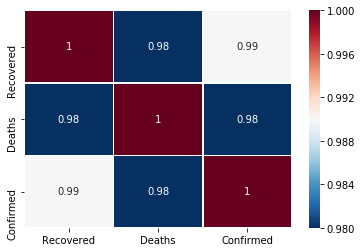

In [4]:
sb.heatmap(corr_matrix, 
            xticklabels=corr_matrix.columns,
            yticklabels=corr_matrix.columns,
            cmap='RdBu_r',
            annot=True,
            linewidth=0.5)


# C. Build a model for predicting the confirmed and recovered on any dates past 15th July 2020: RECOVERED CASES   

In [5]:
df.dtypes


Sno                      int64
Date                    object
Time                    object
State/UnionTerritory    object
Recovered                int64
Deaths                   int64
Confirmed                int64
dtype: object

In [6]:
feature_df = df[['Deaths','Confirmed']]
X = np.asarray(feature_df)
X[0:5]

array([[0, 1],
       [0, 1],
       [0, 1],
       [0, 1],
       [0, 1]], dtype=int64)

In [7]:
df['Recovered'] = df['Recovered'].astype('int')
y = np.asarray(df['Recovered'])
y [0:5]

array([0, 0, 0, 0, 0])

In [8]:
X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.2, random_state=4)
print ('Train set:', X_train.shape,  y_train.shape)
print ('Test set:', X_test.shape,  y_test.shape)

Train set: (90, 2) (90,)
Test set: (23, 2) (23,)


In [9]:
from sklearn import svm
clf = svm.SVC(kernel='rbf')
clf.fit(X_train, y_train) 

C:\Users\Himani Bali\Anaconda3\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
  kernel='rbf', max_iter=-1, probability=False, random_state=None,
  shrinking=True, tol=0.001, verbose=False)

In [10]:
yhat = clf.predict(X_test)
yhat [0:23]

array([1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1,
       1])

In [11]:
from sklearn.metrics import f1_score
f1_score(y_test, yhat, average='weighted') 

C:\Users\Himani Bali\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


0.30687830687830686

In [12]:
from sklearn.metrics import jaccard_similarity_score
jaccard_similarity_score(y_test, yhat)

0.43478260869565216

In [13]:
from sklearn import metrics
print("Train set Accuracy: ", metrics.accuracy_score(y_train, clf.predict(X_train)))
print("Test set Accuracy: ", metrics.accuracy_score(y_test, yhat))

Train set Accuracy:  1.0
Test set Accuracy:  0.43478260869565216


# C. Build a model for predicting the confirmed and recovered on any dates past 15th July 2020: CONFIRMED CASES  

In [14]:
feature_df = df[['Deaths','Recovered']]
X = np.asarray(feature_df)
df['Confirmed'] = df['Confirmed'].astype('int')
y = np.asarray(df['Confirmed'])
X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.2, random_state=4)


In [15]:
from sklearn import svm
clf = svm.SVC(kernel='rbf')
clf.fit(X_train, y_train) 

C:\Users\Himani Bali\Anaconda3\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
  kernel='rbf', max_iter=-1, probability=False, random_state=None,
  shrinking=True, tol=0.001, verbose=False)

In [16]:
yhat = clf.predict(X_test)
yhat [0:23]

array([    1,     1,     1,     1,     1,   473,     1,   161, 15252,
           1,  1930, 15252, 15252,  1177, 15252, 15252,     1,     1,
       15252,     1, 15252,   381,  2532])

In [17]:
from sklearn import metrics
print("Train set Accuracy: ", metrics.accuracy_score(y_train, clf.predict(X_train)))
print("Test set Accuracy: ", metrics.accuracy_score(y_test, yhat))

Train set Accuracy:  0.8777777777777778
Test set Accuracy:  0.08695652173913043


# D. Build a classifier for severity gauging

In [18]:
import pandas as pd

In [19]:
data = pd.read_csv("PAML_COVID_Dataset.csv")


In [20]:
data.Gender[data.Gender =='Male'] =1
data.Gender[data.Gender =='Female'] =2

data.Serious_symptoms[data.Serious_symptoms =='chest pain or pressure'] =1
data.Serious_symptoms[data.Serious_symptoms =='difficulty breathing or shortness of breath'] =2
data.Serious_symptoms[data.Serious_symptoms =='loss of speech or movement'] =3

data.Less_common_symptoms[data.Less_common_symptoms =='headache'] =1
data.Less_common_symptoms[data.Less_common_symptoms =='loss of taste or smell'] =2
data.Less_common_symptoms[data.Less_common_symptoms =='a rash on skin, or discolouration of fingers or toes'] =3
data.Less_common_symptoms[data.Less_common_symptoms =='aches and pains'] =4
data.Less_common_symptoms[data.Less_common_symptoms =='sore throat'] =5
data.Less_common_symptoms[data.Less_common_symptoms =='conjunctivitis'] =6
data.Less_common_symptoms[data.Less_common_symptoms =='diarrhoea'] =7

data.Most_common_symptoms[data.Most_common_symptoms =='tiredness'] =1
data.Most_common_symptoms[data.Most_common_symptoms =='fever'] =2
data.Most_common_symptoms[data.Most_common_symptoms =='dry cough'] =3

data.Severity[data.Severity =='Mild'] =1
data.Severity[data.Severity =='Moderate'] =2
data.Severity[data.Severity =='Seviour'] =3

data.Patient_Status[data.Patient_Status =='Covid'] =1
data.Patient_Status[data.Patient_Status =='flu'] =2

data

C:\Users\Himani Bali\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.
C:\Users\Himani Bali\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
C:\Users\Himani Bali\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.
C:\Users\Himani Bali\Anaconda3\lib\site-pac

,Date,Time,State/UnionTerritory,ConfirmedIndianNational,Gender,ConfirmedForeignNational,Age,Serious_symptoms,Less_common_symptoms,Most_common_symptoms,Severity,Patient_Status
0,30/01/20,6:00 PM,Kerala,1,1,0,8,1,1,1,1,1
1,31/01/20,6:00 PM,Kerala,1,2,0,6,2,2,2,2,1
2,1/2/2020,6:00 PM,Kerala,2,1,0,88,3,1,1,3,1
3,2/2/2020,6:00 PM,Kerala,3,1,0,73,3,3,2,3,1
4,3/2/2020,6:00 PM,Kerala,3,2,0,55,1,3,2,2,2
5,4/2/2020,6:00 PM,Kerala,3,2,0,95,1,4,1,2,1
6,5/2/2020,6:00 PM,Kerala,3,2,0,72,1,1,2,2,1
7,6/2/2020,6:00 PM,Kerala,3,2,0,76,2,4,2,1,1
8,7/2/2020,6:00 PM,Kerala,3,2,0,20,3,1,2,3,1
9,8/2/2020,6:00 PM,Kerala,3,2,0,26,2,5,1,3,2


In [21]:
feature_data = data[['Gender','Age','Serious_symptoms','Less_common_symptoms','Most_common_symptoms','Severity']]
X = np.asarray(feature_data)
X[0:5]

array([[1, 8, 1, 1, 1, 1],
       [2, 6, 2, 2, 2, 2],
       [1, 88, 3, 1, 1, 3],
       [1, 73, 3, 3, 2, 3],
       [2, 55, 1, 3, 2, 2]], dtype=object)

In [22]:
data['Patient_Status'] = data['Patient_Status'].astype('int')
y = np.asarray(data['Patient_Status'])
y [0:5]

array([1, 1, 1, 1, 2])

In [23]:
X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.2, random_state=4)
print ('Train set:', X_train.shape,  y_train.shape)
print ('Test set:', X_test.shape,  y_test.shape)

Train set: (2508, 6) (2508,)
Test set: (627, 6) (627,)


In [24]:
from sklearn import svm
clf = svm.SVC(kernel='rbf')
clf.fit(X_train, y_train) 

C:\Users\Himani Bali\Anaconda3\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
  kernel='rbf', max_iter=-1, probability=False, random_state=None,
  shrinking=True, tol=0.001, verbose=False)

In [25]:
yhat = clf.predict(X_test)
yhat [0:5]

array([1, 1, 1, 1, 2])

In [26]:
from sklearn import metrics
print("Train set Accuracy: ", metrics.accuracy_score(y_train, clf.predict(X_train)))
print("Test set Accuracy: ", metrics.accuracy_score(y_test, yhat))

Train set Accuracy:  0.7320574162679426
Test set Accuracy:  0.4800637958532695
